In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open("prepro.data", "rb") as inp:
    data = pickle.load(inp)

In [3]:
patient0 = data[1]

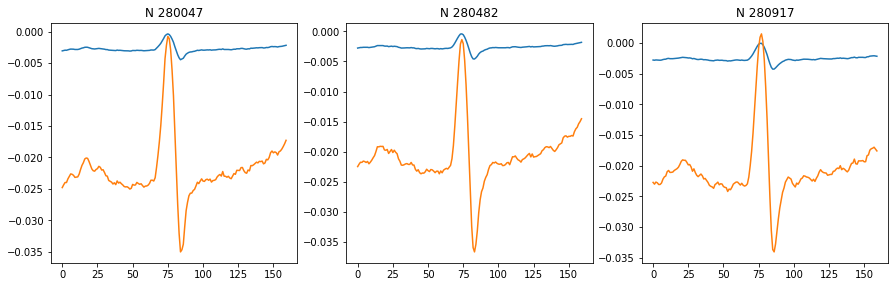

In [4]:
i = 0
plt.figure(figsize=(15,15))
for beattype, position in patient0[1][664:667]:
    plt.subplot(3,3,i+1)
    plt.title(beattype + " " + str(position))
    plt.plot(patient0[0][position-80:position+80])
    i+= 1

In [5]:
patient_nr = 0
final_data = []
for signal, annotations in data:
    filtered_annotations = [x for x in annotations if x[0] in "NLRBAaJSVrFejnE/f?"]
    
    for annotation_type, annotation_position in filtered_annotations:
        sample = {}
        wave_1 = signal[annotation_position-80:annotation_position+80][::,0]
        wave_2 = signal[annotation_position-80:annotation_position+80][::,1]
        
        sample["patient"] = patient_nr
        sample["beat_type"] = annotation_type
        sample["beat_position"] = annotation_position
        sample["wave1"] = wave_1
        sample["wave2"] = wave_2
        
        final_data.append(sample)
    patient_nr += 1

In [6]:
final_data = pd.DataFrame(final_data)

In [ ]:
final_data.to_pickle("")